# Análise das Viagens de 2024

In [23]:
ano = 2024
caminho_dados = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/{ano}_Viagem.csv"
caminho_saida_tabela = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Analise_Viagens_{ano}.xlsx"
caminho_saida_tabela2 = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Tabela_Outliers.xlsx"
caminho_saida_grafico = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Grafico_{ano}.png"
caminho_saida_grafico2 = f"/content/drive/MyDrive/Dados/Dados_Viagens_2024/output/Grafico2_{ano}.png"

In [2]:
import pandas as pd

In [3]:
# Serve para mostrar todas as colunas no gráfico para uma melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option("display.float_format", "{:.2f}".format)

# O "decimal = ','" serve para transformar os dados numéricos do arquivo em "float"
df_viagens = pd.read_csv(caminho_dados,encoding='Windows-1252', sep=';', decimal = ',')

In [4]:
# Com o "decimal" faz com que dê certo a soma dos valores
df_viagens["Despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

In [5]:
# Ajuste de valores nulos no "Cargo" para não excluir esses dados nulos
df_viagens["Cargo"] = df_viagens["Cargo"].fillna("CARGO NÃO IDENTIFICADO")

In [6]:
# Transformando as colunas de datas para o formato que é usado aqui no Brasil (estava em formato americano)
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format = "%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format = "%d/%m/%Y")

In [7]:
# Criação de novas colunas para ter uma visualização melhor do mês que foi feita e a viagem e quantos foram os dias de viagem
df_viagens["Mês da viagem"] = df_viagens["Período - Data de início"].dt.month_name()
df_viagens["Dias de viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [8]:
# Código para a criação da tabela consolidada e filtrada
df_viagens_consolidado = (
    df_viagens
    .groupby("Cargo")
    .agg(
        despesa_media=("Despesas", "mean"),
        duração_media=("Dias de viagem", "mean"),
        despesas_totais=("Despesas", "sum"),
        destino_mais_frequente=("Destinos", pd.Series.mode),
        n_viagens=("Nome", "count")
        )
    .reset_index()
    .sort_values(by="despesas_totais", ascending=False)
    )

In [9]:
# Deixando apenas para os cargos que são maiores que 1% em quantidade de viagens
df_cargos = df_viagens["Cargo"].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos["proportion"] > 0.01, "Cargo"]
filtro = df_viagens_consolidado["Cargo"].isin(cargos_relevantes)
# Chegando na tabela final consolidada e filtrada
df_final = df_viagens_consolidado.loc[filtro].sort_values(by="n_viagens", ascending=False)
# Caminho para o gráfico ficar em excel na pasta "output"
df_final.to_excel(caminho_saida_tabela, index=False)

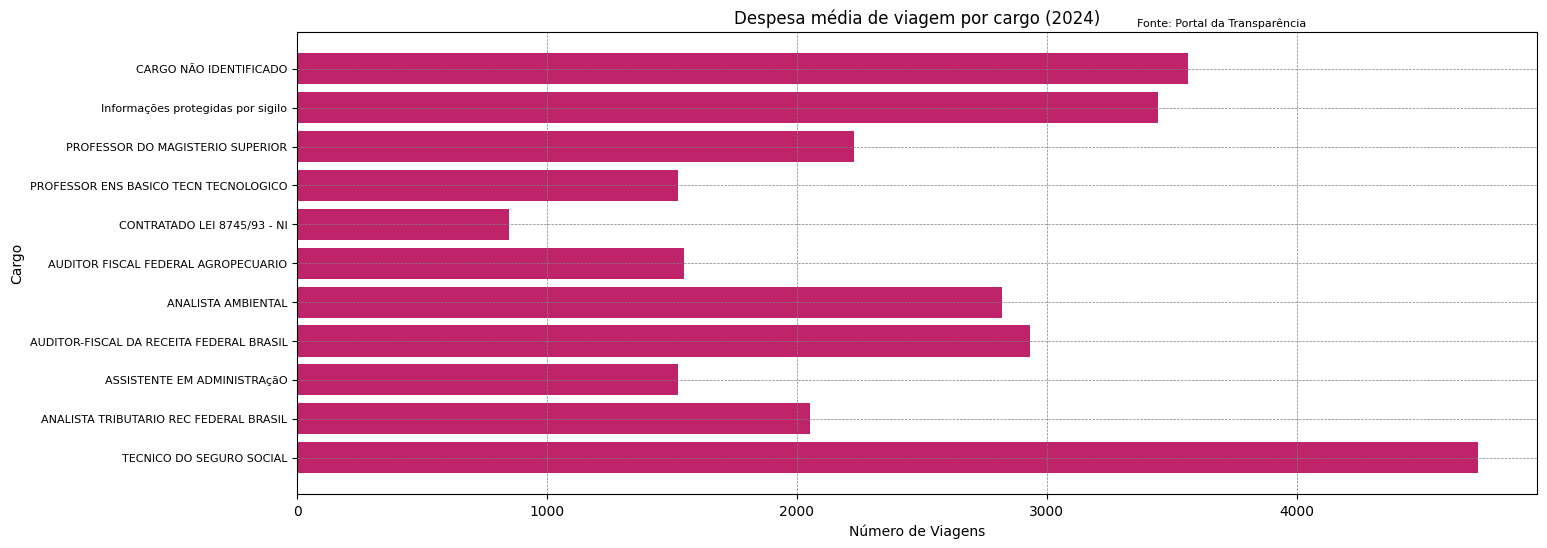

In [18]:
import matplotlib.pyplot as plt

# Criação da figura seca (sem nada)
fig, ax = plt.subplots(figsize=(16,6))

# Colocando as informações essenciais do que quero visualizar: Cargo e número de viagens
ax.barh(df_final["Cargo"], df_final["despesa_media"], color="#bf246b")

ax.invert_yaxis()

# Ajustes de cores, títulos e fonte do gráfico

ax.set_title("Despesa média de viagem por cargo (2024)")

ax.set_xlabel("Número de Viagens")

ax.set_ylabel("Cargo")

plt.grid(color = "gray", linestyle="--", linewidth="0.5")

plt.figtext(0.65, 0.89, "Fonte: Portal da Transparência", fontsize = 8)

plt.yticks(fontsize = 8)

# Código para salvar a figura na pasta "output"
plt.savefig(caminho_saida_grafico,bbox_inches="tight")

# Exibição do gráfico
plt.show()

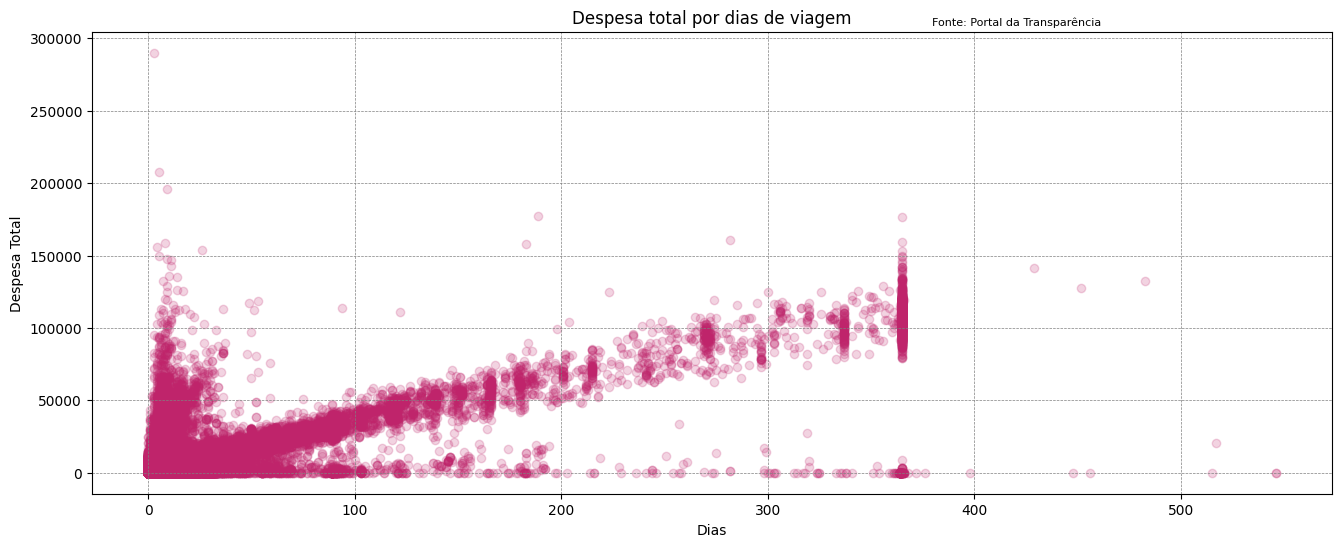

In [21]:
# Criação da figura seca (sem nada)
fig, ax = plt.subplots(figsize=(16,6))

# Definindo o tipo de gráfico e colocando as informações essenciais do que quero visualizar: Dias de viagem e Despesas
ax.scatter(df_viagens["Dias de viagem"], df_viagens["Despesas"], color="#bf246b", alpha=0.2)

# Ajustes de cores, títulos e fonte do gráfico
ax.set_title("Despesa total por dias de viagem")

ax.set_xlabel("Dias")

ax.set_ylabel("Despesa Total")

plt.grid(color = "gray", linestyle="--", linewidth="0.5")

plt.figtext(0.65, 0.89, "Fonte: Portal da Transparência", fontsize = 8)

# Código para salvar a figura na pasta "output"
plt.savefig(caminho_saida_grafico2,bbox_inches="tight")

# A tabela mostra uma tendência de quanto mais dias de viagens, mais há gasto

In [31]:
# Tabela com filtro que mostra quais foram as pessoas que gastaram mais de R$175.000,00 e em qual período de tempo
filtro = df_viagens["Despesas"] > 175000
df_viagens[filtro].to_excel(caminho_saida_tabela2)
df_viagens[filtro]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
9962,19668216,000844/24-17C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",30000,Ministério da Justiça e Segurança Pública,30000,Ministério da Justiça e Segurança Pública - Un...,***.468.361-**,BRUNO REZENDE CABRAL,CARGO NÃO IDENTIFICADO,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade a PCDP 051838/23 - Centro de C...,118425.85,58502.93,0.00,0.00,176928.78,January,365
241437,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,-1,Sem informação,-1,Sem informação,***.693.051-**,IRAJA REZENDE DE LACERDA,CARGO NÃO IDENTIFICADO,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,195861.40,May,9
264206,19989596,014282/24,Não realizada,NÃO,Sem informação,25000,Ministério da Fazenda,25000,Ministério da Fazenda - Unidades com vínculo d...,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,290096.16,June,3
331625,20073775,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006400272,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-07-07,2025-01-12,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,153371.34,12503.74,0.00,11755.96,177631.04,July,189
360300,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,CARGO NÃO IDENTIFICADO,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,207897.47,July,5
